<a href="https://colab.research.google.com/github/Chhavi0404/soc-/blob/main/assignment3_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [11]:
# Load and preprocess the CIFAR-100 dataset
(X_train, Y_train), (X_test, Y_test) = datasets.cifar100.load_data()

# Normalize pixel values
X_train, Y_testtest = X_train / 255.0, X_test / 255.0

X, Y = np.vstack((X_train, X_test)), np.vstack((Y_train, Y_test))

def shuffle_train_data(X_train, Y_train):
  perm = np.random.permutation(len(Y_train))
  Xtr_shuf = X_train[perm]
  Ytr_shuf = Y_train[perm]
  return Xtr_shuf, Ytr_shuf


X_shuffled, Y_shuffled = shuffle_train_data(X, Y)

(train_images,train_labels) = X_shuffled[:50000, ...], Y_shuffled[:50000, ...]

(test_images,test_labels) = X_shuffled[50000:, ...], Y_shuffled[50000:, ...]


print(f'Train images shape: {train_images.shape}')
print(f'Test images shape: {test_images.shape}')
print(f'Train labels shape: {train_labels.shape}')
print(f'Test labels shape: {test_labels.shape}')

Train images shape: (50000, 32, 32, 3)
Test images shape: (10000, 32, 32, 3)
Train labels shape: (50000, 1)
Test labels shape: (10000, 1)


In [20]:
model = models.Sequential()

model.add(layers.Conv2D(64,(3,3), activation="relu",padding="same" , input_shape=(32,32,3)))
model.add(layers.Conv2D(64,(3,3), activation="relu",padding="same"))
model.add(layers.MaxPooling2D((2,2),strides=(2,2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(128,(3,3), activation="relu",padding="same"))
model.add(layers.Conv2D(128,(3,3), activation="relu",padding="same"))
model.add(layers.MaxPooling2D((2,2),strides=(2,2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(256,(3,3), activation="relu",padding="same"))
model.add(layers.Conv2D(256,(3,3), activation="relu",padding="same"))
model.add(layers.MaxPooling2D((2,2),strides=(2,2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(512,(3,3), activation="relu",padding="same"))
model.add(layers.Conv2D(512,(3,3), activation="relu",padding="same"))
model.add(layers.MaxPooling2D((2,2),strides=(2,2)))
model.add(layers.Dropout(0.4))


model.add(layers.Flatten())
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(256,activation="relu"))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(100,activation="softmax"))

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_24 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_18 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 128)       147584    
                                                      

In [21]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

In [22]:
train_labels_categorical = tf.keras.utils.to_categorical(train_labels)
test_labels_categorical = tf.keras.utils.to_categorical(test_labels)

history = model.fit(train_images, train_labels_categorical, epochs=60,
                    validation_data=(test_images, test_labels_categorical),
                    batch_size=64)

Epoch 1/60
782/782 [==============================] - 24s 26ms/step - loss: 4.6340 - accuracy: 0.0095 - val_loss: 4.6052 - val_accuracy: 0.0093
Epoch 2/60
782/782 [==============================] - 20s 25ms/step - loss: 4.6063 - accuracy: 0.0099 - val_loss: 4.6051 - val_accuracy: 0.0066
Epoch 3/60
782/782 [==============================] - 19s 25ms/step - loss: 4.6022 - accuracy: 0.0105 - val_loss: 4.5979 - val_accuracy: 0.0171
Epoch 4/60
782/782 [==============================] - 20s 25ms/step - loss: 4.5069 - accuracy: 0.0179 - val_loss: 4.4106 - val_accuracy: 0.0194
Epoch 5/60
782/782 [==============================] - 20s 25ms/step - loss: 4.3688 - accuracy: 0.0230 - val_loss: 4.2902 - val_accuracy: 0.0271
Epoch 6/60
782/782 [==============================] - 19s 25ms/step - loss: 4.2586 - accuracy: 0.0329 - val_loss: 4.1113 - val_accuracy: 0.0473
Epoch 7/60
782/782 [==============================] - 20s 25ms/step - loss: 4.1284 - accuracy: 0.0478 - val_loss: 3.9980 - val_accuracy:

In [18]:
test_labels_categorical = tf.keras.utils.to_categorical(test_labels)

test_loss, test_acc = model.evaluate(test_images, test_labels_categorical, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')


313/313 - 1s - loss: 1.8919 - accuracy: 0.4916 - 1s/epoch - 5ms/step

Test accuracy: 0.4916


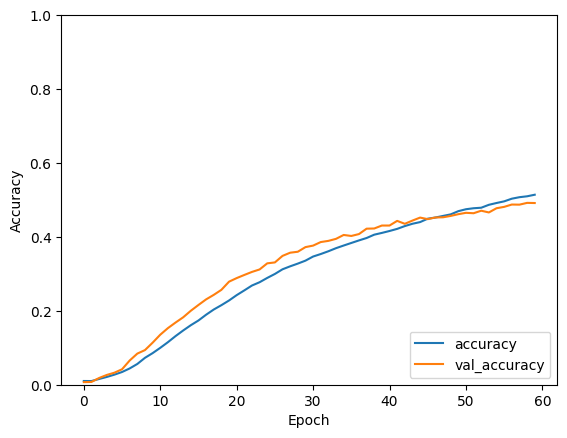

In [19]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()